In [1]:
from sklearn.metrics import confusion_matrix
import seaborn as sbs
import pandas as pd
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

df = pd.read_csv('data1.csv')
df = df.drop(['Unnamed: 32'], axis=1)
df['diagnosis'] = df['diagnosis'].replace({'M': 0, 'B': 1})

X = df.drop(['diagnosis'], axis=1)
y = df['diagnosis']

## Decision Tree

In [18]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
clf = DecisionTreeClassifier(random_state=0)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
print('Training set score: {:.4f}'.format(clf.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(clf.score(X_test, y_test)))




Model accuracy score with criterion gini index: 0.9035
Training set score: 1.0000
Test set score: 0.9035


## Confusion matrix

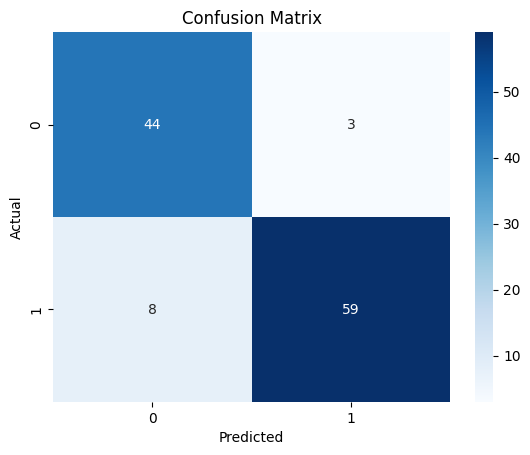

In [19]:
cm = confusion_matrix(y_test, y_pred)
sbs.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Cross Validation

In [29]:
#chose best cross validation score
import pandas as pd
from sklearn import model_selection
from sklearn.model_selection import cross_val_score

list = []
for i in range(2,20):
  kfold = model_selection.KFold(n_splits=i)
  modelCV = clf
  scoring = 'accuracy'
  results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
  list.append(results.mean())

df = pd.DataFrame({'Number of splits': range(2, 20), 'Score': list})

indice_max = df['Score'].idxmax()
fila_max = df.loc[indice_max]
fila_max


Number of splits    16.000000
Score                0.936192
Name: 14, dtype: float64

## Validation curve

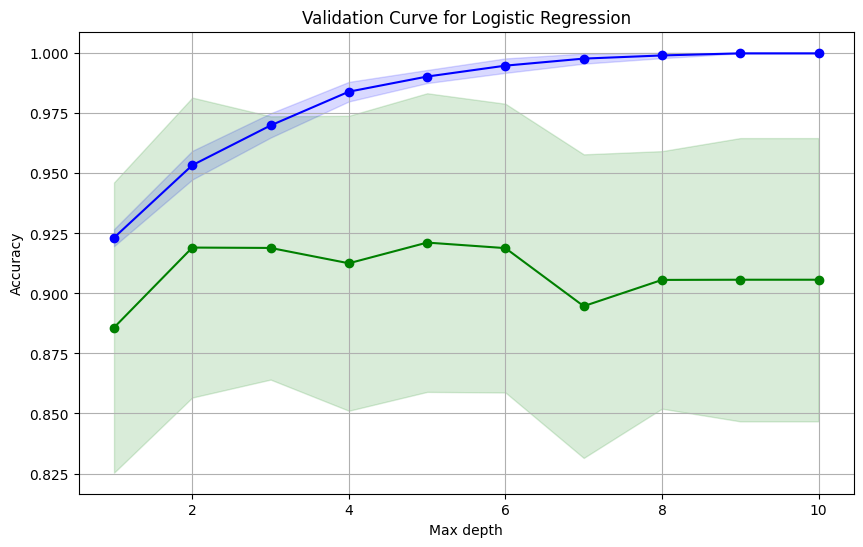

In [30]:
from sklearn.model_selection import validation_curve
param_range = np.arange(1, 11)

train_scores, test_scores = validation_curve(
    DecisionTreeClassifier(random_state=0), 
    X_train, y_train, param_name='max_depth', param_range=param_range, cv=16, scoring='accuracy')

# Calculate the mean and standard deviation of validation scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the validation curve
plt.figure(figsize=(10, 6))
plt.plot(param_range, train_mean, label='Training score', color='b', marker='o')
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, alpha=0.15, color='b')
plt.plot(param_range, test_mean, label='Validation score', color='g', marker='o')
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, alpha=0.15, color='g')
plt.title('Validation Curve for Logistic Regression')
plt.xlabel('Max depth')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

## Grid search with cross validation

In [37]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': np.arange(1, 10),
}
grid_search = GridSearchCV(estimator = clf,  
                           param_grid = parameters,
                           #scoring = 'accuracy',
                           cv = 16,)
                           #verbose=0)


grid_search.fit(X_train, y_train)
# examine the best model

# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))

# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

GridSearch CV best score : 0.9212


Parameters that give the best results : 

 {'max_depth': 5}


Estimator that was chosen by the search : 

 DecisionTreeClassifier(max_depth=5, random_state=0)


In [38]:
print('GridSearch CV score on train set: {0:0.4f}'.format(grid_search.score(X_train, y_train)))
print('GridSearch CV score on test set: {0:0.4f}'.format(grid_search.score(X_test, y_test)))


GridSearch CV score on train set: 0.9890
GridSearch CV score on test set: 0.9474
